In [1]:
from fastbook import *

In [2]:
searches = 'chicken', 'sheep', 'cow', 'pig', 'goat', 'duck'
path = Path('farm_animal')

if not path.exists():
    path.mkdir(parents=True, exist_ok=True)
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_sizes=400, dest=dest)

/Users/noah.olsen/Documents/Coding/fast_ai/.venv/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/noah.olsen/Documents/Coding/fast_ai/.venv/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/noah.olsen/Documents/Coding/fast_ai/.venv/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/noah.olsen/Documents/Coding/fast_ai/.venv/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/noah.olsen/Documents/Coding/fast_ai/.venv/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expres

In [3]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#31) [None,None,None,None,None,None,None,None,None,None...]

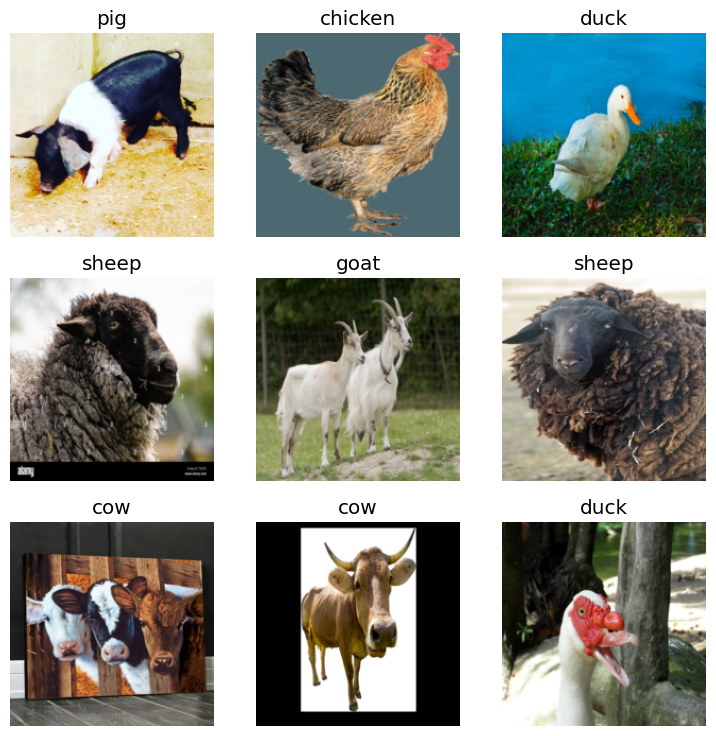

In [4]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=9)

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.993532,0.420728,0.137615,00:57


epoch,train_loss,valid_loss,error_rate,time
0,0.462653,0.359223,0.100917,00:57
1,0.330918,0.298023,0.087156,00:57
2,0.225669,0.278731,0.082569,00:59
3,0.153899,0.295521,0.082569,01:01
4,0.108837,0.282841,0.077982,01:02
5,0.082562,0.277509,0.077982,01:02
6,0.061939,0.266030,0.068807,01:02
7,0.048316,0.264678,0.068807,01:02
8,0.038233,0.260523,0.064220,01:02
9,0.030913,0.261519,0.068807,01:02


In [6]:
urls = search_images_ddg('goat photos', max_images = 1)
len(urls),urls[0]

(1, 'https://ggwo.org/wp-content/uploads/2021/04/goats.jpg')

In [7]:
dest = Path('goat.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

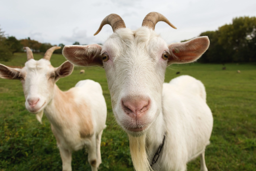

In [8]:
im = Image.open(dest)
im.to_thumb(256,256)

In [9]:
farm_animal,_,probs = learn.predict(PILImage.create('goat.jpg'))
max_prob = probs.max().item()
print(f"This is a {farm_animal}.")
print(f"Probability it's a {farm_animal}: {max_prob:.2f}")

This is a goat.
Probability it's a goat: 1.00
